# EDA

In [1]:
FILE = 'data/copper_production_v1.csv'

In [2]:
import pandas as pd

In [3]:
# load FILE
df = pd.read_csv(
    FILE, 
    index_col=0, 
    parse_dates=['Date']
)

In [4]:
df.shape

(154, 8)

In [5]:
df.head()

,Machine,Shift,Operator,Date,Cable Failures,Cable Failure Downtime,Other Failures,Other Failure Downtime
0,6,A,12,2020-11-15,0,0,1,60
1,6,B,12,2020-11-10,0,0,0,0
2,2,A,2,2020-11-06,1,10,3,150
3,8,B,13,2020-11-16,3,175,0,0
4,7,B,14,2020-11-21,1,55,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 153
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Machine                 154 non-null    int64         
 1   Shift                   154 non-null    object        
 2   Operator                154 non-null    int64         
 3   Date                    154 non-null    datetime64[ns]
 4   Cable Failures          154 non-null    int64         
 5   Cable Failure Downtime  154 non-null    int64         
 6   Other Failures          154 non-null    int64         
 7   Other Failure Downtime  154 non-null    int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 10.8+ KB


In [7]:
df.describe()

,Machine,Operator,Cable Failures,Cable Failure Downtime,Other Failures,Other Failure Downtime
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,5.896104,13.064935,1.383117,51.461039,0.558442,47.402597
std,4.278184,8.608914,1.314564,56.533654,0.996642,105.446794
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,12.000000,1.000000,35.000000,0.000000,0.000000
75%,8.000000,18.750000,2.000000,70.000000,1.000000,45.000000
max,17.000000,32.000000,6.000000,295.000000,9.000000,690.000000


## Check for & remove exact duplicates

In [8]:
# a duplicate is defined as two or more records with the same values for all columns in the data
number_dupes = len(df[df.duplicated()])
# report the number of duplicates that were removed
print(f'The number of dupes: {number_dupes}')

The number of dupes: 5


In [9]:
# remove the duplicates
df.drop_duplicates(inplace=True)
len(df)

149

## Combine multiple records

In [10]:
# there shouldn't be more than one record per Machine-Shift-Operator-Date combination
# combine any such records so the resulting record contains the sums of the remaining columns
more_dupes = df[df.duplicated(subset=['Machine','Shift','Operator','Date'], keep=False)]
display(more_dupes)
df = df.groupby(['Machine','Shift','Operator','Date'], as_index=False).sum()
len(df)

,Machine,Shift,Operator,Date,Cable Failures,Cable Failure Downtime,Other Failures,Other Failure Downtime
4,7,B,14,2020-11-21,1,55,0,0
27,5,A,9,2020-11-17,2,110,0,0
40,7,B,14,2020-11-21,3,65,1,30
63,5,A,9,2020-11-17,1,50,0,0
80,8,B,13,2020-11-21,2,65,1,130
96,7,A,9,2020-11-21,1,30,0,0
118,8,B,13,2020-11-21,0,0,1,80
148,7,A,9,2020-11-21,1,35,0,0


145

## How many machines, shifts, & operators are included in the data? Plot the number of records for each.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(
    context='notebook',
    style='darkgrid', 
    palette='husl',
    rc={"figure.figsize":(24, 8)}
)

In [12]:
# get the total number of unique Machines in the data as well as how many records exist for each
machine_counts = df['Machine'].value_counts()
print(f'The total number of Machines: {len(machine_counts)}')
machine_counts

The total number of Machines: 17


2     27
3     19
7     16
1     15
8     11
5      9
4      8
6      8
10     6
15     5
16     5
9      4
13     3
14     3
11     3
12     2
17     1
Name: Machine, dtype: int64

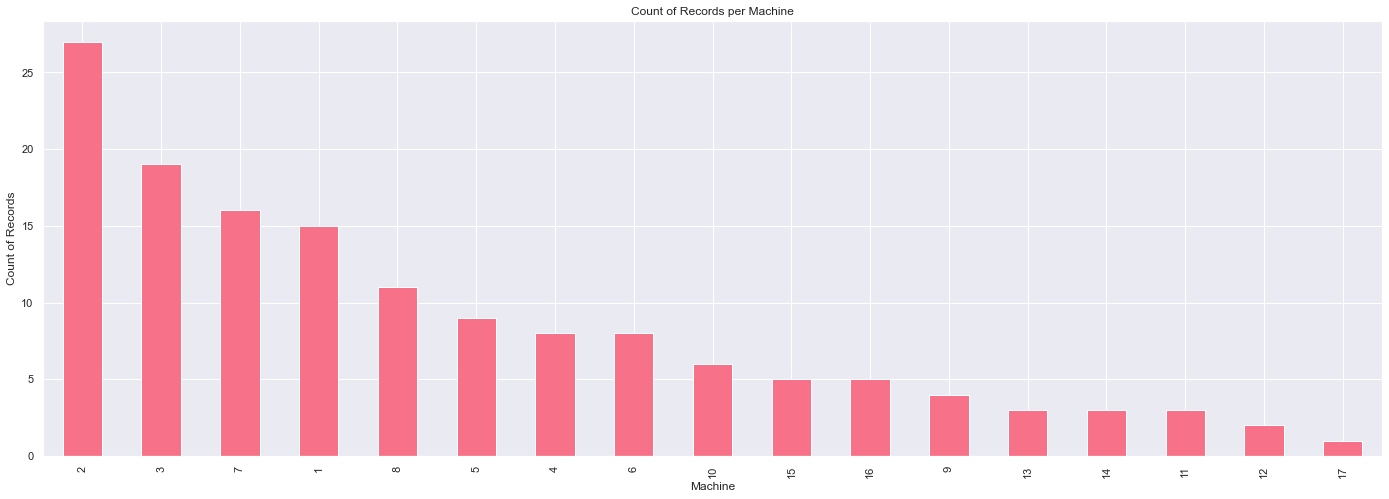

In [13]:
# plot the count of records per machine
machine_counts.plot(
    kind='bar', 
    title='Count of Records per Machine', 
    xlabel='Machine', 
    ylabel='Count of Records'
);

In [14]:
# get the total number of unique Shifts in the data as well as how many records exist for each
shift_counts = df['Shift'].value_counts()
print(f'The total number of Shifts: {len(shift_counts)}')
shift_counts

The total number of Shifts: 2


A    74
B    71
Name: Shift, dtype: int64

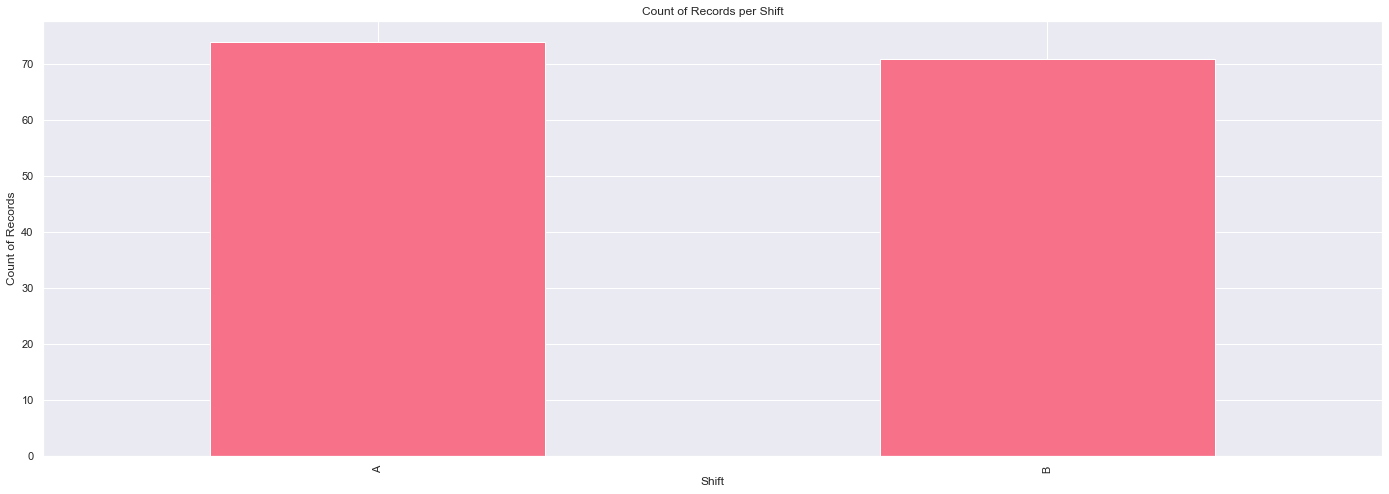

In [15]:
# plot the count of records per Shift
shift_counts.plot(
    kind='bar', 
    title='Count of Records per Shift', 
    xlabel='Shift', 
    ylabel='Count of Records'
);

In [16]:
# get the total number of unique Operators in the data as well as how many records exist for each
operator_counts = df['Operator'].value_counts()
print(f'The total number of Operators: {len(operator_counts)}')
operator_counts

The total number of Operators: 32


14    13
1     11
9      9
3      8
6      8
7      8
8      8
27     7
26     7
13     7
4      6
12     5
16     5
21     5
5      5
10     4
18     4
15     3
30     3
31     3
24     3
20     2
2      2
25     1
22     1
11     1
23     1
32     1
19     1
29     1
17     1
28     1
Name: Operator, dtype: int64

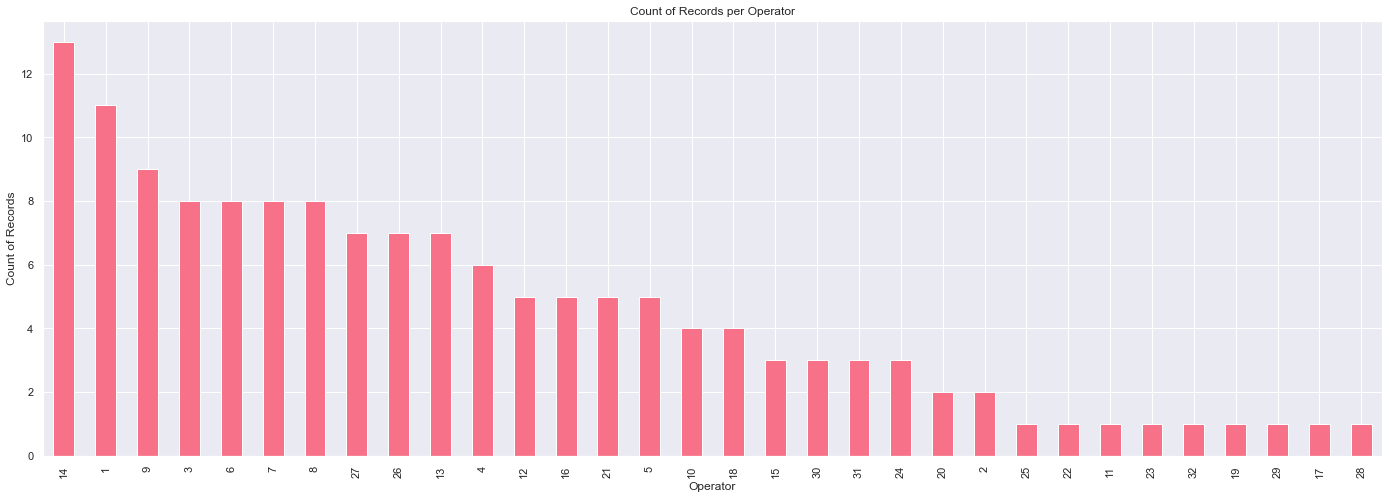

In [17]:
# plot the count of records per Operator
operator_counts.plot(
    kind='bar', 
    title='Count of Records per Operator', 
    xlabel='Operator', 
    ylabel='Count of Records'
);

## How many unique combinations of Machine-Shift-Operator?

In [18]:
# get the total number of unique Machine-Shift-Operator combinations in the data as well as how many records exist for each
combo_counts = df[['Machine','Shift','Operator']].value_counts()
print(f'The total number of unique Machine-Shift-Operator combinations: {len(combo_counts)}')
combo_counts

The total number of unique Machine-Shift-Operator combinations: 65


Machine  Shift  Operator
7        B      14          10
1        A      1            7
2        B      3            5
7        A      9            5
1        B      21           5
                            ..
7        A      13           1
8        A      7            1
                15           1
         B      15           1
17       A      27           1
Length: 65, dtype: int64

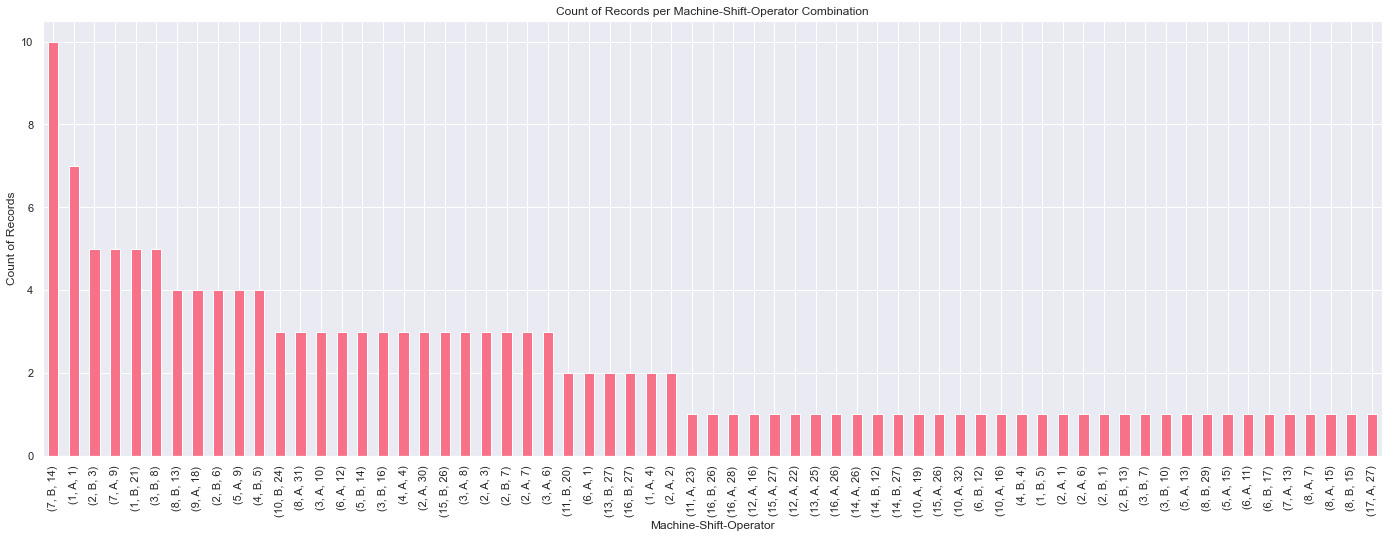

In [19]:
# plot the count of unique Machine-Shift-Operator combinations
combo_counts.plot(
    kind='bar', 
    title='Count of Records per Machine-Shift-Operator Combination', 
    xlabel='Machine-Shift-Operator', 
    ylabel='Count of Records'
);

## How many dates are included in the data?

In [20]:
# get the total number of unique Shifts in the data as well as how many records exist for each
date_counts = df['Date'].value_counts()
print(f'The total number of Dates: {len(date_counts)}')
date_counts

The total number of Dates: 16


2020-11-10    14
2020-11-14    13
2020-11-21    13
2020-11-22    13
2020-11-17    12
2020-11-15    12
2020-11-13    12
2020-11-18    10
2020-11-12     9
2020-11-19     8
2020-11-20     7
2020-11-16     7
2020-11-09     6
2020-11-08     4
2020-11-06     3
2020-11-07     2
Name: Date, dtype: int64

### Are any dates that should be covered by the range of the data missing? If so, which and how could this be addressed?

In [21]:
# identify if any dates are missing in the data
# if so, explain how the missing data could be addressed

## Create 'Day of Week' column

In [22]:
# insert a new column indicating the day of the week e.g., Monday
df['Date'] = pd.to_datetime(df['Date'])
df['Day of Week'] = df['Date'].dt.day_name()
df.head()

,Machine,Shift,Operator,Date,Cable Failures,Cable Failure Downtime,Other Failures,Other Failure Downtime,Day of Week
0,1,A,1,2020-11-06,1,35,1,30,Friday
1,1,A,1,2020-11-09,1,40,1,95,Monday
2,1,A,1,2020-11-14,1,10,0,0,Saturday
3,1,A,1,2020-11-17,0,0,1,30,Tuesday
4,1,A,1,2020-11-18,1,60,0,0,Wednesday


## Create 'Total Failures' & 'Total Downtime' columns

In [23]:
# insert two new columns to calculate the simple sum of failures & downtime for a given record
df['Total Failures'] = df['Cable Failures'] + df['Other Failures']
df['Total Failure Downtime'] = df['Cable Failure Downtime'] + df['Other Failure Downtime']
df.head()

,Machine,Shift,Operator,Date,Cable Failures,Cable Failure Downtime,Other Failures,Other Failure Downtime,Day of Week,Total Failures,Total Failure Downtime
0,1,A,1,2020-11-06,1,35,1,30,Friday,2,65
1,1,A,1,2020-11-09,1,40,1,95,Monday,2,135
2,1,A,1,2020-11-14,1,10,0,0,Saturday,1,10
3,1,A,1,2020-11-17,0,0,1,30,Tuesday,1,30
4,1,A,1,2020-11-18,1,60,0,0,Wednesday,1,60


## Plot the sum of downtimes by 'Date'

In [24]:
# prep the data, calculate sums
by_date_df = df.groupby('Date').sum()
by_date_df = by_date_df.sort_values('Date')
by_date_df.head()

,Machine,Operator,Cable Failures,Cable Failure Downtime,Other Failures,Other Failure Downtime,Total Failures,Total Failure Downtime
Date,,,,,,,,
2020-11-06,5,6,4,85,6,290,10,375
2020-11-07,4,5,7,160,2,115,9,275
2020-11-08,8,22,3,220,1,40,4,260
2020-11-09,17,30,10,380,2,115,12,495
2020-11-10,87,177,27,915,3,55,30,970


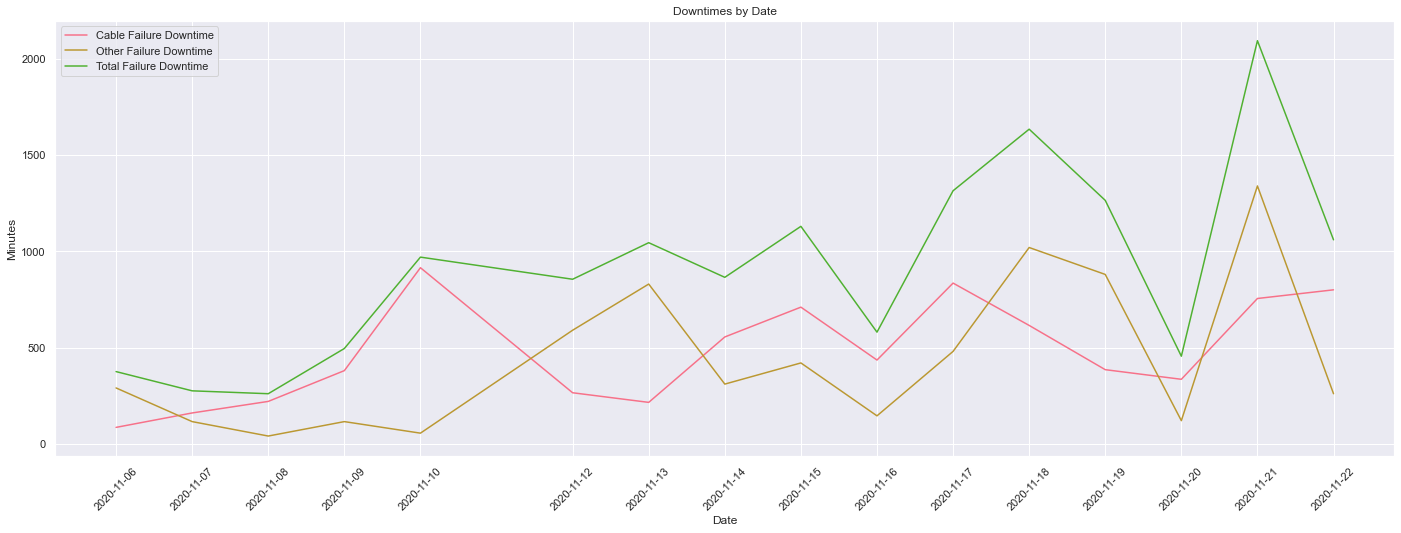

In [25]:
# line chart with 'Date' along the x-axis (in ascending chronological order), minutes along the y-axis, & three lines: Cable Failure Downtime, Other Failure Downtime, & Total Failure Downtime
plt.plot('Cable Failure Downtime', data=by_date_df)
plt.plot('Other Failure Downtime', data=by_date_df)
plt.plot('Total Failure Downtime', data=by_date_df)

plt.title('Downtimes by Date')
plt.ylabel('Minutes')
plt.xlabel('Date')
plt.xticks([i for i in by_date_df.index])
plt.xticks(rotation=45)

plt.legend();

## Plot the mean downtime by 'Day of Week'

In [26]:
# prep the data, calculate means
by_weekday_df = df.groupby('Day of Week').mean()
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
by_weekday_df = by_weekday_df.reindex(weekday_order)
by_weekday_df.head()

,Machine,Operator,Cable Failures,Cable Failure Downtime,Other Failures,Other Failure Downtime,Total Failures,Total Failure Downtime
Day of Week,,,,,,,,
Monday,4.615385,9.153846,1.846154,62.692308,0.384615,20.000000,2.230769,82.692308
Tuesday,6.192308,13.653846,1.769231,67.307692,0.384615,20.576923,2.153846,87.884615
Wednesday,5.800000,15.100000,1.600000,61.500000,0.800000,102.000000,2.400000,163.500000
Thursday,4.941176,13.176471,1.235294,38.235294,0.294118,86.470588,1.529412,124.705882
Friday,5.909091,12.409091,1.045455,28.863636,0.772727,56.363636,1.818182,85.227273


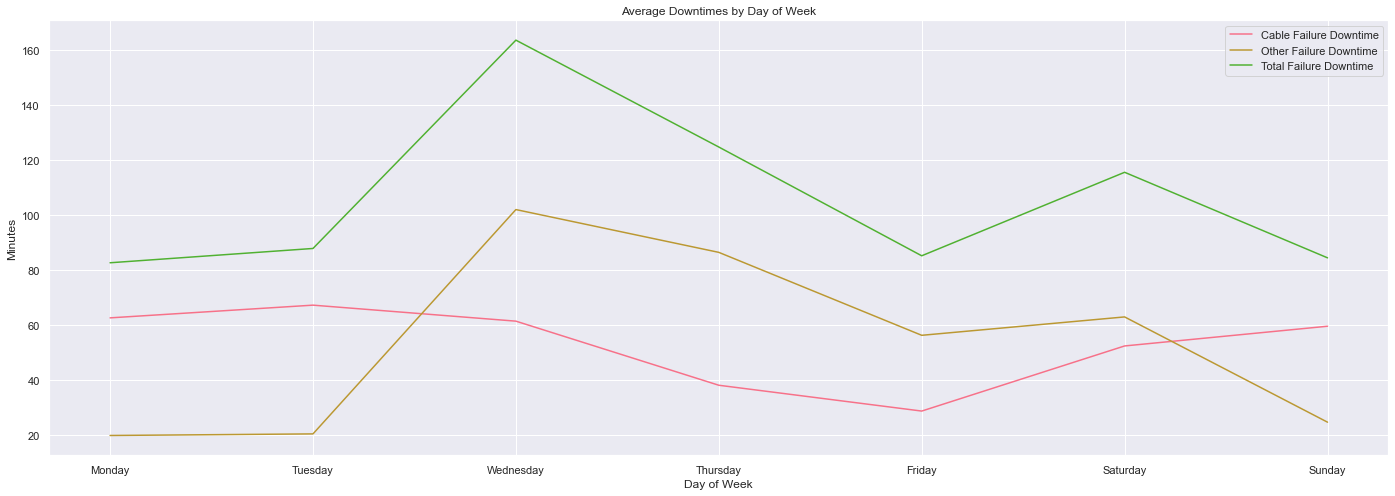

In [27]:
# line chart with 'Day of Week' along the x-axis, minutes along the y-axis, & three lines: Cable Failure Downtime, Other Failure Downtime, & Total Failure Downtime
plt.plot('Cable Failure Downtime', data=by_weekday_df)
plt.plot('Other Failure Downtime', data=by_weekday_df)
plt.plot('Total Failure Downtime', data=by_weekday_df)

plt.title('Average Downtimes by Day of Week')
plt.ylabel('Minutes')
plt.xlabel('Day of Week')

plt.legend();

# Other ideas
- Identify the Machines responsible for 80% of overall 'Total Failures'
- Assume some dollar amount related to downtime (e.g. we lose $8 per minute of Cable Failure Downtime and $5 per minute of Other Failure Downtime) are certain machines or operators responsible for more lost revenue?
- Are incidents of failures increasing/decreasing or are downtimes getting shorter/longer?

# End